0.9836983457264716
0.19416195865637956
0.09133516981840262
0.05565149532953243
0.039393943586053366
0.030756039795949926
0.025600912336975
0.022187172589622318
0.019705657003232995
0.017759339122602406
0.016145714956257398
0.0147573423230134
0.013534342825973588
0.012441183899407855
0.011455151476531181
0.010560544304313895
0.009745699667368227
0.009001434168691844
0.008320199665521359
0.007695605940561539
0.007122135275438681
0.0065949603263474625
0.006109819801492107
0.005662928136248581
0.0052509063852987075
0.004870727222542378
0.004519669909257456
0.004195282684400341
0.003895350914710781
0.0036178698538697402
0.0033610211717413157
0.0031231526157398147
0.0029027603034896417
0.0026984732443066915
0.002509039760638317
0.002333315537483299
0.002170253072863729
0.0020188923386787938
0.001878352490915328
0.001747824492534955
0.001626564532616422
0.0015138881421918257
0.0014091649213730578
0.0013118138042544291
0.0012212987981648172
0.001137125142344659
0.0010588358383781863
0.00098600

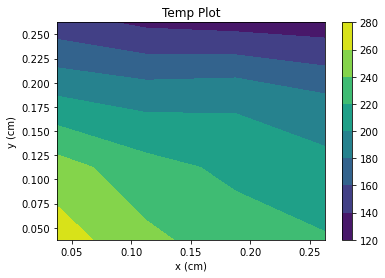

In [44]:
import numpy as np
import matplotlib.pyplot as plt
#.......................Now we need to solve this AT=B equation using Gauss seidel ........
def Gauss_seidel(A,B):
    key=0
    n=len(A)
    x=np.ones(n) #.................#initial guess as 1 for all the x
    x_0=np.ones(n)
    epc=10**(-9)
    COUNT=0
    while(key==0):
        for i in range(0,n):
            sum1=B[i]
            for j in range(0,n):
                if(i!=j):
                    sum1= sum1-A[i][j]*x_0[j]
            x[i]=sum1/A[i][i]
            k=abs((x[i]-x_0[i])/x[i])
            if(abs((x[i]-x_0[i])/x[i])<epc):
                key=1
            x_0[i]=x[i]            
        COUNT=COUNT+1
        print(k)
    print(COUNT)
    return x
#..........................End of Gauss_seidel....................
Nx=4
Ny=4
L=0.3
H=0.4
dx=np.zeros(Nx+1)
dy=np.zeros(Nx+1)
dx[0]=L/Nx
dy[0]=L/Ny
for i in range(1,Nx+1):
    dx[i]=dx[i-1]*1
for i in range(1,Ny+1):
    dy[i]=dy[i-1]*1
cx=np.zeros(Nx+1)
cy=np.zeros(Ny+1)
node_x=np.zeros(Nx)
node_y=np.zeros(Ny)
for i in range(1,Nx+1):
    cx[i]=cx[i-1]+dx[i]
for i in range(0,Nx):
    node_x[i]=(cx[i]+cx[i+1])/2
for i in range(1,Ny+1):
    cy[i]=cy[i-1]+dy[i]
for i in range(0,Ny):
    node_y[i]=(cy[i]+cy[i+1])/2 
# [X,Y] =np.meshgrid(x,y)
for i in range(0,Nx+1):
    cx[i]=(cx[i]/cx[-1])*L
for i in range(0,Nx+1):
    cy[i]=(cy[i]/cy[-1])*H
[X,Y]=np.meshgrid(node_x,node_y)
# ..............................cx is storing face value cx[i] and node_x is giving cell center value ......

dx_1=L/Nx #### to avoid initial confusion we ignore streatching case ############ 
dy_1=H/Ny #### to avoid initial confusion we ignore streatching case ############
#..............................................
k= 1000
q=0
qw=500000
T3=100
#Area=1
N=Nx*Ny
#..........................Need to create A and B matric to AT=B............. and find T using Gauss-Seidel
A=np.zeros((N,N) ,dtype=np.float32)
B=np.zeros(N,dtype=np.float32)
T=np.zeros(N,dtype=np.float32)
#.....................calculation of coefficient of A..................................
for i in range(0,N):
    for j in range(0,N):
        if(i==0): #1
            Aw=0
            Ae=k*dy_1/dx_1*0.01
            An=k*dx_1/dy_1*0.01
            As=0
            Sp=0                            #-(2*k*dy_1)/dx_1 -(2*k*dx_1)/dy_1
            Su=qw*dy_1*0.01                 #(q*dy_1*dx_1)+((2*k*dy_1)/dx_1)*T4+((2*k*dx_1)/dy_1)*T1
            Ap=Aw+Ae+An+As-Sp
            if(j==0):
                A[i][j]= Ap
            if(j==i+1):
                A[i][j]=-Ae
            if(j==Nx):
                A[i][j]=-An
            B[i]=Su
        elif(i==(Nx -1)):#3
            Aw=(k*dy_1)/dx_1*0.01
            Ae=0
            An=(k*dx_1)/dy_1*0.01
            As=0
            Sp=0                          #-(2*k*dy_1)/dx_1-(2*k*dx_1)/dy_1
            Su=0                          #(q*dy_1*dx_1) + ((2*k*dy_1)/dx_1)*T2 +((2*k*dx_1)/dy_1)*T1
            Ap=Aw+Ae+An+As-Sp
            if(j==i):
                A[i][j]=Ap
            if(j==i-1):
                A[i][j]=-Aw
            if(j==i+Nx):
                A[i][j]=-An
            B[i]=Su
        elif(i==(N-1)):#9
            Aw=(k*dy_1)/dx_1*0.01
            Ae=0
            An=0
            As=(k*dx_1)/dy_1*0.01
            Sp-(2*k*dx_1)/dy_1*0.01
            Su=+((2*k*dx_1)/dy_1)*T3*0.01
            Ap=Aw+Ae+An+As-Sp
            if(j==i):
                A[i][j]=Ap
            if(j==(i-1)):
                A[i][j]=-Aw
            if(j==(i-Nx)):
                A[i][j]=-As
            B[i]=Su
        elif(i==(N-Nx)):#7done
            Aw=0
            Ae=(k*dy_1)/dx_1*0.01
            An=0
            As=(k*dx_1)/dy_1*0.01
            Sp= -(2*k*dx_1)/dy_1*0.01
            Su=qw*dy_1*0.01 +((2*k*dx_1)/dy_1)*T3*0.01
            Ap=Aw+Ae+An+As-Sp
            if(j==i):
                A[i][j]=Ap
            if(j==(i+1)):
                A[i][j]=-Ae
            if(j==(i-Nx)):
                A[i][j]=-As
            B[i]=Su
        elif(1<=i<=(Nx-2)):   #2done
            Aw=(k*dy_1)/dx_1*0.01
            Ae=(k*dy_1)/dx_1*0.01
            An=(k*dx_1)/dy_1*0.01
            As=0
            Sp=0
            Su=0
            Ap=Aw+Ae+An+As-Sp
            if(j==i):
                A[i][j]=Ap
            if(j==i+1):
                A[i][j]=-Ae
            if(j==i-1):
                A[i][j]=-Aw
            if(j==i+Nx):
                A[i][j]=-An
            B[i]=Su
        elif(i%(Nx)==(Nx-1)):#6done 
            Aw=(k*dy_1)/dx_1*0.01
            Ae=0
            An=(k*dx_1)/dy_1*0.01
            As=(k*dx_1)/dy_1*0.01
            Sp=0
            Su=0
            Ap=Aw+Ae+An+As-Sp
            if(j==i):
                A[i][j]=Ap
            if(j==(i+Nx)):
                A[i][j]=-An
            if(j==(i-Nx)):
                A[i][j]=-As
            if(j==(i-1)):
                A[i][j]=-Aw           
            B[i]=Su
            #print(B[i])
        elif((N-Nx)<i<(N-1)):#8
            Aw=(k*dy_1)/dx_1*0.01
            Ae=(k*dy_1)/dx_1*0.01
            An=0
            As=(k*dx_1)/dy_1*0.01
            Sp=-(2*k*dx_1)/dy_1*0.01
            Su=((2*k*dx_1)/dy_1)*T3*0.01
            Ap=Aw+Ae+An+As-Sp
            if(j==i):
                A[i][i]=Ap
            if(j==i+1):
                A[i][j]=-Ae
            if(j==i-1):
                A[i][j]=-Aw
            if(j==(i-Nx)):
                A[i][j]=-As            
            B[i]=Su
        elif(i%(Nx-1)==1):#4
            Aw=0
            Ae=(k*dy_1)/dx_1*0.01
            An=(k*dx_1)/dy_1*0.01
            As=(k*dx_1)/dy_1*0.01
            Sp=0
            Su=qw*dy_1*0.01
            Ap=Aw+Ae+An+As-Sp
            if(j==i):
                A[i][i]=Ap
            if(j==i+1):
                A[i][j]=-Ae
            if(j==(i-Nx)):
                A[i][j]=-As
            if(j==(i+Nx)):
                A[i][j]=-An  
            B[i]=Su
            #print(B[i])
        else:#5
            Aw=(k*dy_1)/dx_1*0.01
            Ae=(k*dy_1)/dx_1*0.01
            An=(k*dx_1)/dy_1*0.01
            As=(k*dx_1)/dy_1*0.01
            Sp=0
            Su=0
            Ap=Aw+Ae+An+As-Sp
            A[i][i]=Ap
            A[i][i+1]=-Ae
            A[i][i-1]=-Aw
            A[i][i+Nx]=-An
            A[i][i-Nx]=-As
            B[i]=Su
#print(A)
T=Gauss_seidel(A,B)
#print(B)
T_final=np.reshape(T, (Ny,Nx))
print(T_final)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T_final)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Temp Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.savefig("output2.png",dpi=600)
plt.show()